In [3]:
# Objective: predict total sales for every product and store in the next month.
# For that I need a monthly sales table and currently I have daily sales only.

from libs.simple_plotter import simple_heatmap
import pandas as pd


# DATA = pd.read_csv('./input/sales_train.csv', parse_dates = ['date'], infer_datetime_format = True, dayfirst = True)
DATA = pd.read_csv('./input/sales_train.csv')
# shops = pd.read_csv('./input/shops.csv')
# items = pd.read_csv('./input/items.csv')
# cats = pd.read_csv('./input/item_categories.csv')
DATA.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.0,14.569911,9.422988,0.0,7.0,14.0,23.0,33.0
shop_id,2935849.0,33.001728,16.226973,0.0,22.0,31.0,47.0,59.0
item_id,2935849.0,10197.227057,6324.297354,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935849.0,890.853233,1729.799631,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935849.0,1.242641,2.618834,-22.0,1.0,1.0,1.0,2169.0


In [2]:
DATA.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
# Preparing the table with monthly sales
# it is half of the size of the original table but still more than 1.5 mio of records
# this might be hard to process
# monthly sales amount varies from -2 to 225

monthly_sales = DATA.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False)['item_cnt_day'].sum()
monthly_sales = monthly_sales.rename(columns={"date_block_num": "month_number", "item_cnt_day": "monthly_sales"})
monthly_sales['monthly_sales'] = monthly_sales['monthly_sales'].astype(int)

monthly_sales.describe()

,month_number,shop_id,item_id,monthly_sales
count,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06
mean,1.466479e+01,3.280585e+01,1.068099e+04,2.267200e+00
std,9.542322e+00,1.653701e+01,6.238883e+03,8.649882e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.200000e+01
25%,6.000000e+00,2.100000e+01,5.045000e+03,1.000000e+00
50%,1.400000e+01,3.100000e+01,1.049700e+04,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.606000e+04,2.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,2.253000e+03


In [5]:
# no nulls, all in numbers

monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609124 entries, 0 to 1609123
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   month_number   1609124 non-null  int64
 1   shop_id        1609124 non-null  int64
 2   item_id        1609124 non-null  int64
 3   monthly_sales  1609124 non-null  int64
dtypes: int64(4)
memory usage: 49.1 MB


In [5]:
monthly_sales


,month_number,shop_id,item_id,monthly_sales
0,0,0,32,6
1,0,0,33,3
2,0,0,35,1
3,0,0,43,1
4,0,0,51,2
...,...,...,...,...
1609119,33,59,22087,6
1609120,33,59,22088,2
1609121,33,59,22091,1
1609122,33,59,22100,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   month_number   34 non-null     int64
 1   monthly_sales  34 non-null     int64
dtypes: int64(2)
memory usage: 672.0 bytes
None


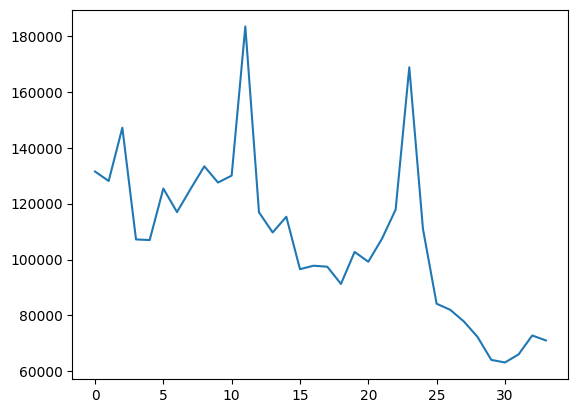

In [6]:
# Let's see summarized global sales amount per month, just to take a look at the global sales trends and seasons
# there is definitely seasonality and trends related to it.

import matplotlib.pyplot as plt

global_sales = monthly_sales.groupby(['month_number'], as_index=False)['monthly_sales'].sum()
print(global_sales.info())

fig, ax = plt.subplots()
ax.plot(global_sales.month_number, global_sales.monthly_sales)


In [9]:
# The full data
# I want to extract that trend by using specific shop id or item id.
# And it looks like each shop has different amount of items,
# monthly_sales

items_in_shop = monthly_sales.copy()
items_in_shop = items_in_shop.drop(columns=['monthly_sales'])

res = items_in_shop.groupby(['shop_id'], as_index=False)['month_number'].count()

res
#
# fig, ax = plt.subplots()
# ax.plot(res.shop_id, res.month_number)

,shop_id,month_number
0,0,4821
1,1,3282
2,2,15553
3,3,16827
4,4,23741
5,5,24108
6,6,47250
7,7,32700
8,8,2465
9,9,1591


In [12]:
by_shop = monthly_sales.query('shop_id==31')
res = by_shop.groupby(['item_id'], as_index=False)['month_number'].count()
res


,item_id,month_number
0,26,1
1,27,1
2,28,3
3,29,2
4,30,26
...,...,...
14411,22160,7
14412,22162,8
14413,22163,3
14414,22164,9


In [11]:
# Let's check which item and shop id are most frequently used.

items_frequent = monthly_sales['item_id'].value_counts()
shops_frequent = monthly_sales['shop_id'].value_counts()

print("shop id:", shops_frequent.index[0], "used times:", shops_frequent.values[0])  # 31
print("item id:", items_frequent.index[0], "used times:", items_frequent.values[0])  # 5822

# print(shops_frequent)

shop id: 31 used times: 99241
item id: 5822 used times: 1452


In [7]:
# so, for quick training I will use by_shop table as it's much smaller than the original
# import sys, imp
# imp.reload(sys.modules['constants'])
from constants import preprocessed_data

monthly_sales.to_csv(preprocessed_data, index=False)

print("Done")


Done
